<a href="https://colab.research.google.com/github/AndroGari/IntrusionDetectionSystem/blob/master/ModelTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
import sklearn 
import imblearn 

import warnings
warnings.filterwarnings('ignore') 

pdf=pd.read_csv('/content/drive/MyDrive/Subdataset1.csv') 
ndf=pd.read_csv('/content/drive/MyDrive/Subdataset2.csv')


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier


In [ ]:
ndf[["date","time"]]=ndf["DATETIME"].str.split(" ",expand=True)
ndf[["date","month","year"]]=ndf["date"].str.split("/",expand=True)


In [ ]:

ndf[["date&time"]]="20"+ndf["year"].astype(str)+"-"+ndf["month"]+"-"+ndf["date"]+" "+ndf["time"]+":00:00"
ndf.drop(["date","month","year","time"],axis=1,inplace=True)


In [ ]:
import datetime as dt
ndf["date&time"]=pd.to_datetime(ndf["date&time"])
timestamp=[]
timestamp=ndf["date&time"]
LABEL=[] 
 
dt1=dt.datetime(2020,9,13,23)
td1=dt.datetime(2020,9,16,00)
dt2=dt.datetime(2020,9,26,11)
td2=dt.datetime(2020,9,27,10)
dt3=dt.datetime(2020,10,9,9)
td3=dt.datetime(2020,10,11,20)
dt4=dt.datetime(2020,10,29,19)
td4=dt.datetime(2020,11,2,16)
dt5=dt.datetime(2020,11,26,17)
td5=dt.datetime(2020,11,29,4)
dt6=dt.datetime(2020,12,6,7)
td6=dt.datetime(2020,12,10,4)
dt7=dt.datetime(2020,12,14,15)
td7=dt.datetime(2020,12,19,4)


for i in range(len(timestamp)):
  if timestamp[i]>=dt1 and timestamp[i]<=td1:
    LABEL.append(1)
  elif timestamp[i]>=dt2 and timestamp[i]<=td2:
    LABEL.append(1)
  elif timestamp[i]>=dt3 and timestamp[i]<=td3:
    LABEL.append(1)
  elif timestamp[i]>=dt4 and timestamp[i]<=td4:
    LABEL.append(1)
  elif timestamp[i]>=dt5 and timestamp[i]<=td5:
    LABEL.append(1)
  elif timestamp[i]>=dt6 and timestamp[i]<=dt6:
    LABEL.append(1)
  elif timestamp[i]>=dt7 and timestamp[i]<=td7: 
    LABEL.append(1) 
  else: 
    LABEL.append(0) 
  

In [ ]:
ndf.drop(["date&time"],axis=1,inplace=True)
ndf["LABEL"]=LABEL

In [ ]:
le = LabelEncoder()
datetime = le.fit_transform(ndf['DATETIME'])
datetime2= le.fit_transform(pdf['DATETIME'])
ndf["DATETIME"]=datetime
pdf["DATETIME"]=datetime2

# ndf.drop(["datetime"],axis=1,inplace=True)
ndf

,DATETIME,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,S_PU2,F_PU3,S_PU3,F_PU4,S_PU4,F_PU5,S_PU5,F_PU6,S_PU6,F_PU7,S_PU7,F_PU8,S_PU8,F_PU9,S_PU9,F_PU10,S_PU10,F_PU11,S_PU11,F_V2,S_V2,P_J280,P_J269,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,LABEL
0,360,2.44,5.24,3.19,4.10,2.86,5.50,4.39,93.63,1,93.65,1,0,0,0.00,0,0,0,0.00,0,49.84,1,35.54,1,0,0,29.87,1,0.0,0,0.00,0,2.98,36.38,28.26,70.00,28.22,85.87,21.69,82.72,21.58,71.99,39.33,29.64,0
1,361,2.66,4.53,3.20,4.18,3.29,5.44,4.53,89.41,1,89.43,1,0,0,34.26,1,0,0,0.00,0,48.38,1,37.83,1,0,0,0.00,0,0.0,0,0.00,0,2.98,38.60,24.39,87.73,24.45,84.87,29.81,86.62,29.81,59.76,42.17,26.15,0
2,362,3.11,3.66,3.66,4.21,3.87,5.15,3.22,89.88,1,89.89,1,0,0,32.97,1,0,0,0.00,0,46.84,1,37.31,1,0,0,0.00,0,0.0,0,0.00,0,2.98,38.36,23.84,89.29,23.90,87.11,29.85,87.64,29.85,58.50,42.00,25.56,0
3,363,3.62,3.04,4.17,4.04,3.56,4.98,2.40,88.10,1,88.12,1,0,0,33.27,1,0,0,0.00,0,0.00,0,0.00,0,0,0,32.68,1,0.0,0,0.00,0,2.98,39.29,27.00,91.98,27.10,68.75,31.60,64.25,31.47,72.30,43.24,28.38,0
4,364,4.08,2.68,4.73,3.20,3.11,5.39,3.46,87.01,1,87.03,1,0,0,32.99,1,0,0,0.00,0,0.00,0,0.00,0,0,0,32.81,1,0.0,0,0.00,0,2.98,39.85,26.67,92.11,26.76,68.74,32.30,64.23,32.17,72.53,44.00,28.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,3380,2.65,2.37,3.85,3.04,3.82,4.94,2.19,120.08,1,0.00,0,0,0,0.00,0,0,0,0.00,0,50.30,1,34.27,1,0,0,30.71,1,0.0,0,67.23,1,2.99,21.70,27.42,70.03,27.38,84.14,18.45,81.67,18.34,66.04,29.88,28.98,0
4173,3381,2.24,2.56,3.42,2.92,3.69,5.02,1.97,119.12,1,0.00,0,0,0,0.00,0,0,0,0.00,0,50.78,1,0.00,0,0,0,32.47,1,0.0,0,70.89,1,2.99,22.25,27.71,68.60,27.66,83.46,25.40,60.85,25.28,66.89,30.19,29.29,0
4174,3382,1.91,2.76,2.95,2.49,2.70,5.14,1.87,120.71,1,0.00,0,0,0,36.84,1,0,0,0.00,0,50.69,1,0.00,0,0,0,32.43,1,0.0,0,66.71,1,2.99,21.33,26.77,85.63,26.84,82.82,24.46,59.56,24.34,66.08,29.68,28.78,0
4175,3383,1.52,2.52,3.33,2.03,1.69,5.10,1.39,120.02,1,0.00,0,0,0,35.98,1,0,0,36.94,1,36.92,1,0.00,0,0,0,32.42,1,0.0,0,76.14,1,2.99,21.74,25.75,86.15,25.78,103.63,24.77,59.01,24.65,66.42,28.98,28.08,0


In [ ]:
ndf.info(), pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATETIME  4177 non-null   int64  
 1    L_T1     4177 non-null   float64
 2    L_T2     4177 non-null   float64
 3    L_T3     4177 non-null   float64
 4    L_T4     4177 non-null   float64
 5    L_T5     4177 non-null   float64
 6    L_T6     4177 non-null   float64
 7    L_T7     4177 non-null   float64
 8    F_PU1    4177 non-null   float64
 9    S_PU1    4177 non-null   int64  
 10   F_PU2    4177 non-null   float64
 11   S_PU2    4177 non-null   int64  
 12   F_PU3    4177 non-null   int64  
 13   S_PU3    4177 non-null   int64  
 14   F_PU4    4177 non-null   float64
 15   S_PU4    4177 non-null   int64  
 16   F_PU5    4177 non-null   int64  
 17   S_PU5    4177 non-null   int64  
 18   F_PU6    4177 non-null   float64
 19   S_PU6    4177 non-null   int64  
 20   F_PU7    4177 non-null   floa

(None, None)

In [ ]:
 ndf.shape, pdf.shape

((4177, 45), (8761, 44))

In [ ]:
X = ndf.drop(["LABEL"],axis=1).values
Y = ndf.iloc[:, -1].values
Y=np.ravel(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3, random_state = 0,stratify = Y)

In [ ]:
ndf.LABEL.value_counts()

0    3778
1     399
Name: LABEL, dtype: int64

In [ ]:
XM=pdf
print(f"X_train dimensions: {X_train.shape}")
print(f"Y_train dimensions: {Y_train.shape}\n")

print(f"X_test dimensions: {X_test.shape}")
print(f"Y_test dimensions: {Y_test.shape}\n")

print(f"XM dimensions: {XM.shape}")

X_train dimensions: (2923, 44)
Y_train dimensions: (2923,)

X_test dimensions: (1254, 44)
Y_test dimensions: (1254,)

XM dimensions: (8761, 44)


Text(0, 0.5, 'Count')

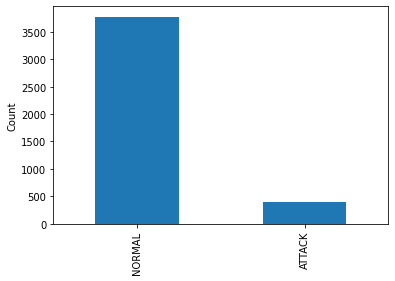

In [ ]:
# Visualize class distribution
ndf.LABEL.value_counts().plot(kind='bar')
plt.xticks([0,1], ['NORMAL', 'ATTACK'])
plt.ylabel('Count')

In [ ]:
relation = ndf.corr()
print (relation['LABEL'].sort_values(ascending=False)[:5], '\n')
print (relation['LABEL'].sort_values(ascending=False)[-3:])

LABEL       1.000000
 F_PU11     0.261713
 S_PU11     0.261028
DATETIME    0.088547
 P_J14      0.072457
Name: LABEL, dtype: float64 

 S_PU5   NaN
 F_PU9   NaN
 S_PU9   NaN
Name: LABEL, dtype: float64


In [ ]:
ndf.describe()

,DATETIME,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,S_PU2,F_PU3,S_PU3,F_PU4,S_PU4,F_PU5,S_PU5,F_PU6,S_PU6,F_PU7,S_PU7,F_PU8,S_PU8,F_PU9,S_PU9,F_PU10,S_PU10,F_PU11,S_PU11,F_V2,S_V2,P_J280,P_J269,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,LABEL
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.0,4177.000000,4177.000000,4177.0,4177.0,4177.000000,4177.000000,4177.0,4177.0,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.0,4177.0,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,2088.000000,2.707446,3.287965,4.204496,3.556232,2.748377,5.368429,3.323352,100.839069,1.0,69.385904,0.730907,0.0,0.0,14.495743,0.421116,0.0,0.0,0.987656,0.020828,40.695432,0.830979,21.071535,0.593967,0.0,0.0,24.969457,0.809193,0.186754,0.007661,56.359191,0.726837,2.980898,32.413653,27.762849,79.404214,27.772894,82.665293,24.574898,74.463383,24.482049,68.024829,33.906174,29.447544,0.095523
std,1205.940366,1.209627,1.470462,0.681352,0.544905,0.735800,0.177560,0.838134,10.217831,0.0,42.180931,0.443541,0.0,0.0,17.019697,0.493797,0.0,0.0,6.803157,0.142827,18.578030,0.374815,17.442386,0.491150,0.0,0.0,12.176915,0.392984,2.129031,0.087202,36.199971,0.445637,0.006665,5.640353,2.760860,8.475271,2.740362,7.577549,4.712136,10.020099,4.734871,5.631171,4.599987,2.679226,0.293971
min,0.000000,0.320000,0.310000,2.880000,1.920000,1.280000,4.770000,0.430000,38.920000,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-0.880000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.970000,20.250000,19.440000,66.060000,19.460000,53.940000,13.910000,58.070000,13.640000,51.410000,27.820000,21.320000,0.000000
25%,1044.000000,1.650000,2.150000,3.620000,3.130000,2.130000,5.240000,2.660000,94.170000,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,47.570000,1.000000,0.000000,0.000000,0.0,0.0,29.460000,1.000000,0.000000,0.000000,0.000000,0.000000,2.980000,26.250000,26.640000,71.960000,26.670000,83.860000,20.510000,62.930000,20.400000,66.680000,30.690000,28.430000,0.000000
50%,2088.000000,2.820000,3.490000,4.230000,3.550000,2.750000,5.500000,3.280000,96.650000,1.0,93.860000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,49.160000,1.000000,34.560000,1.000000,0.0,0.0,30.520000,1.000000,0.000000,0.000000,69.960000,1.000000,2.980000,34.770000,28.150000,75.810000,28.140000,85.190000,23.160000,81.170000,23.050000,68.890000,32.250000,29.830000,0.000000
75%,3132.000000,3.780000,4.580000,4.800000,4.000000,3.370000,5.500000,4.040000,112.140000,1.0,96.510000,1.000000,0.0,0.0,33.990000,1.000000,0.0,0.0,0.000000,0.000000,50.030000,1.000000,35.550000,1.000000,0.0,0.0,31.360000,1.000000,0.000000,0.000000,82.810000,1.000000,2.990000,36.100000,29.590000,88.170000,29.570000,86.380000,28.580000,82.650000,28.490000,71.360000,38.230000,31.290000,0.000000
max,4176.000000,5.730000,5.670000,5.430000,4.700000,4.160000,5.500000,5.000000,122.570000,1.0,99.920000,1.000000,0.0,0.0,38.010000,1.000000,0.0,0.0,51.440000,1.000000,51.690000,1.000000,45.620000,1.000000,0.0,0.0,37.350000,1.000000,27.020000,1.000000,122.390000,1.000000,3.000000,61.880000,34.260000,94.870000,34.260000,107.950000,71.110000,95.270000,71.110000,93.730000,77.410000,35.680000,1.000000


In [ ]:
clfr = RandomForestClassifier(n_estimators = 50)
clfr.fit(X_train, Y_train.ravel())
Y_test_pred = clfr.predict(X_test)
print(clfr.score(X_train, Y_train))
print(clfr.score(X_test, Y_test))
print(classification_report(Y_test, Y_test_pred))



0.9986315429353404
0.9401913875598086
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1134
           1       0.96      0.39      0.56       120

    accuracy                           0.94      1254
   macro avg       0.95      0.69      0.76      1254
weighted avg       0.94      0.94      0.93      1254



In [ ]:
y_hat_test = clfr.predict(X_test)
y_hat_train = clfr.predict(X_train)

train_f1 = f1_score(Y_train, y_hat_train)
test_f1 = f1_score(Y_test, y_hat_test)

print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")
clfr.predict_proba(X_test)

Train f1 Score: 0.9927797833935018
Test f1 Score: 0.5562130177514794


array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.8 , 0.2 ],
       [1.  , 0.  ],
       [0.98, 0.02]])

array([[1132,    2],
       [  73,   47]])

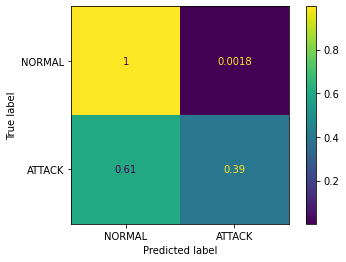

In [ ]:
plot_confusion_matrix(clfr, X_test, Y_test, normalize='true',
                     display_labels=['NORMAL', 'ATTACK']); 
confusion_matrix(Y_test,Y_test_pred)

In [ ]:
X_unlabeled=pdf
pred_probs = clfr.predict_proba(X_unlabeled)
pred_probs

array([[0.84, 0.16],
       [0.72, 0.28],
       [0.72, 0.28],
       ...,
       [0.94, 0.06],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [ ]:
 iterations = 0

train_f1s = []
test_f1s = []
pseudo_labels = [] 

high_prob = [1] 

while len(high_prob) > 0:
        
    clf = RandomForestClassifier(n_estimators = 50)
    clf.fit(X_train, Y_train)
    y_hat_train = clf.predict(X_train)
    y_hat_test = clf.predict(X_test)

    train_f1 = f1_score(Y_train, y_hat_train)
    test_f1 = f1_score(Y_test, y_hat_test)
    print(f"Iteration {iterations}")
    print(f"Train f1: {train_f1}")
    print(f"Test f1: {test_f1}")
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)
   
    print(f"Now predicting labels for unlabeled data...")

    pred_probs = pd.DataFrame([])
    pred_probs = clf.predict_proba(X_unlabeled)   
    preds = clf.predict(X_unlabeled)
    prob_0 = pred_probs[:,0] 
    prob_1 = pred_probs[:,1]

    df_pred_prob = pd.DataFrame([])
    df_pred_prob['preds'] = preds
    df_pred_prob['prob_0'] = prob_0
    df_pred_prob['prob_1'] = prob_1
    df_pred_prob.index = X_unlabeled.index
    
    high_prob = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.99],
                           df_pred_prob.loc[df_pred_prob['prob_1'] > 0.99]],
                          axis=0)
    
    print(f"{len(high_prob)} high-probability predictions added to training data.")
    
    pseudo_labels.append(len(high_prob))
    

    X_train = pd.concat([X_unlabeled.loc[high_prob.index]], axis=0)
    Y_train = pd.concat([high_prob.preds])      
    

    X_unlabeled = X_unlabeled.drop(index=high_prob.index)
    print(f"{len(X_unlabeled)} unlabeled instances remaining.\n")
    
    iterations += 1 
    if train_f1 and test_f1:
        break

Iteration 0
Train f1: 1.0
Test f1: 0.5443786982248521
Now predicting labels for unlabeled data...
1011 high-probability predictions added to training data.
7750 unlabeled instances remaining.



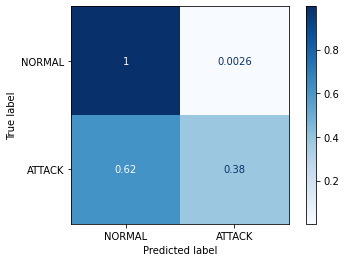

In [ ]:
plot_confusion_matrix(clf, X_test, Y_test, cmap='Blues', normalize='true',
                     display_labels=['NORMAL', 'ATTACK']);